# CSE 4038 - Computer Vision in Health Care Lab

### Name: V Padmaja
### RegNo: 19BAI1107
### Lab Experiment 2: Thresholding Techniques

### Mounting the drive

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


## Importing Necessary Libraries

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageFilter
from skimage.util import random_noise
from skimage.color import rgb2gray
from skimage.color import gray2rgb
import skimage.io
from google.colab.patches import cv2_imshow

## Original Image

### Reading and Displaying the Image

In [3]:
image = cv2.imread('/content/gdrive/MyDrive/IDRiD_13.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

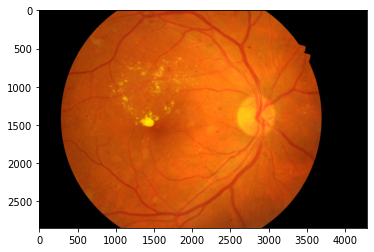

In [4]:
plt.imshow(image)

### Converting to GrayScale

Text(0.5, 1.0, 'Gray Scale')

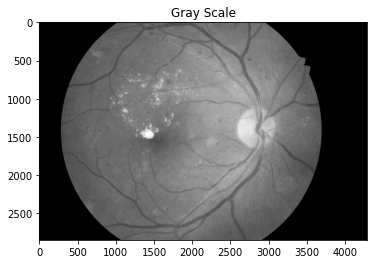

In [5]:
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap="gray")
plt.title("Gray Scale")

## 1. Simple Thresholding
- THRESH_BINARY	
- THRESH_BINARY_INV	
- THRESH_TRUNC	
- THRESH_TOZERO	
- TOZERO_INV

In [6]:
ret, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, 120, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img, 120, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, 120, 255, cv2.THRESH_TOZERO_INV)

### Visualizing different Simple thresholding techniques

Text(0.5, 1.0, 'Set to 0 Inverted')

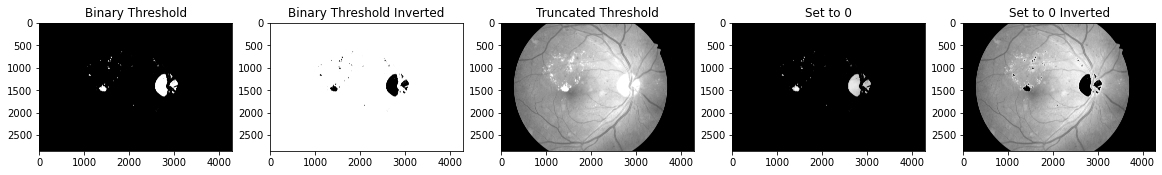

In [7]:
fig, ax = plt.subplots(1,5, figsize=(20,20))

ax[0].imshow(thresh1, cmap="gray");
ax[1].imshow(thresh2, cmap="gray");
ax[2].imshow(thresh3, cmap="gray");
ax[3].imshow(thresh4, cmap="gray");
ax[4].imshow(thresh5, cmap="gray");


ax[0].set_title('Binary Threshold')
ax[1].set_title('Binary Threshold Inverted')
ax[2].set_title('Truncated Threshold')
ax[3].set_title('Set to 0')
ax[4].set_title('Set to 0 Inverted')

### Visualising after slight variations in threshold and maximum value

Text(0.5, 1.0, 'Set to 0 Inverted')

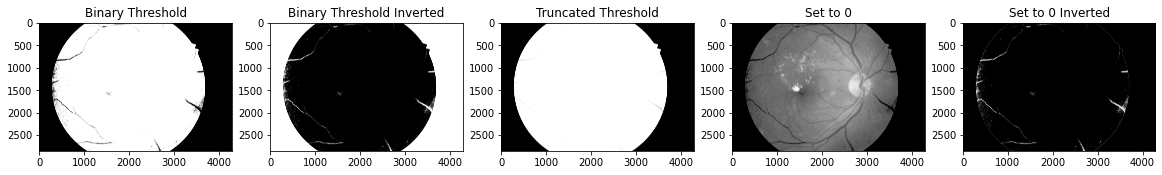

In [18]:
ret, thresh11 = cv2.threshold(img, 50, 200, cv2.THRESH_BINARY)
ret, thresh21 = cv2.threshold(img, 50, 200, cv2.THRESH_BINARY_INV)
ret, thresh31 = cv2.threshold(img, 50, 200, cv2.THRESH_TRUNC)
ret, thresh41 = cv2.threshold(img, 50, 200, cv2.THRESH_TOZERO)
ret, thresh51 = cv2.threshold(img, 50, 200, cv2.THRESH_TOZERO_INV)
fig, ax = plt.subplots(1,5, figsize=(20,20))

ax[0].imshow(thresh11, cmap="gray");
ax[1].imshow(thresh21, cmap="gray");
ax[2].imshow(thresh31, cmap="gray");
ax[3].imshow(thresh41, cmap="gray");
ax[4].imshow(thresh51, cmap="gray");


ax[0].set_title('Binary Threshold')
ax[1].set_title('Binary Threshold Inverted')
ax[2].set_title('Truncated Threshold')
ax[3].set_title('Set to 0')
ax[4].set_title('Set to 0 Inverted')

### Inference: It can be observed that as the threshold and maximum value are reduced the veins in the outer part if the IDRiD Dataset are enhanced in binary threshold and set to 0. The grey values in truncated threshold have however been compromised

## 2. Otsu's Thresholding

Text(0.5, 1.0, 'Otsu thresholding')

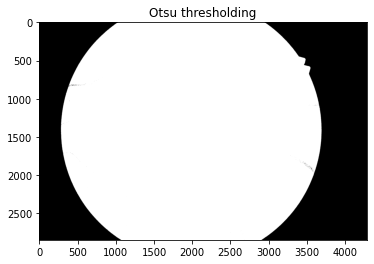

In [8]:
ret, otsu = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)  
plt.imshow(otsu, cmap='gray')
plt.title("Otsu thresholding")

### Visualising after slight variations in threshold and maximum value

Text(0.5, 1.0, 'Otsu thresholding')

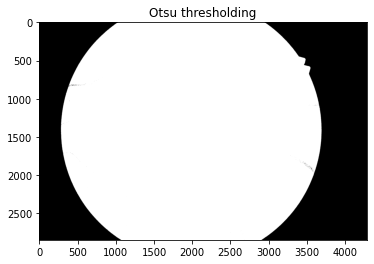

In [14]:
ret_1, otsu_1 = cv2.threshold(img, 0, 200, cv2.THRESH_BINARY + cv2.THRESH_OTSU)  
plt.imshow(otsu_1, cmap='gray')
plt.title("Otsu thresholding")

### Inference: Even after reducing the threshold and maximum value no change has been observed in otsu's thresholding

## Adaptive Thresholding
- ADAPTIVE_THRESH_MEAN_C
- ADAPTIVE_THRESH_GAUSSIAN_C

In [9]:
ada_thresh1 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 199, 5)
ada_thresh2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 199, 5)

Text(0.5, 1.0, 'Gaussian Adaptive Threshold')

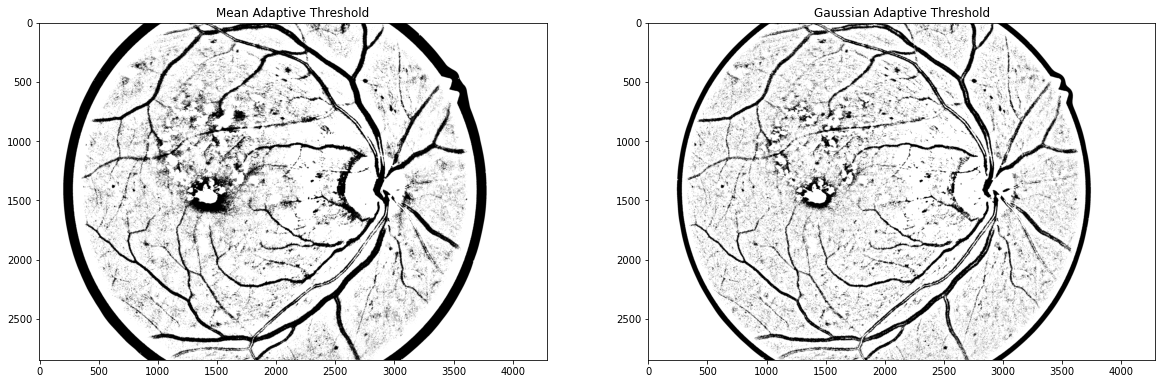

In [10]:
fig, ax = plt.subplots(1,2, figsize=(20,20))

ax[0].imshow(ada_thresh1, cmap="gray");
ax[1].imshow(ada_thresh2, cmap="gray");

ax[0].set_title('Mean Adaptive Threshold')
ax[1].set_title('Gaussian Adaptive Threshold')

### Visualising after slight variations in constant and maximum value

Text(0.5, 1.0, 'Gaussian Adaptive Threshold')

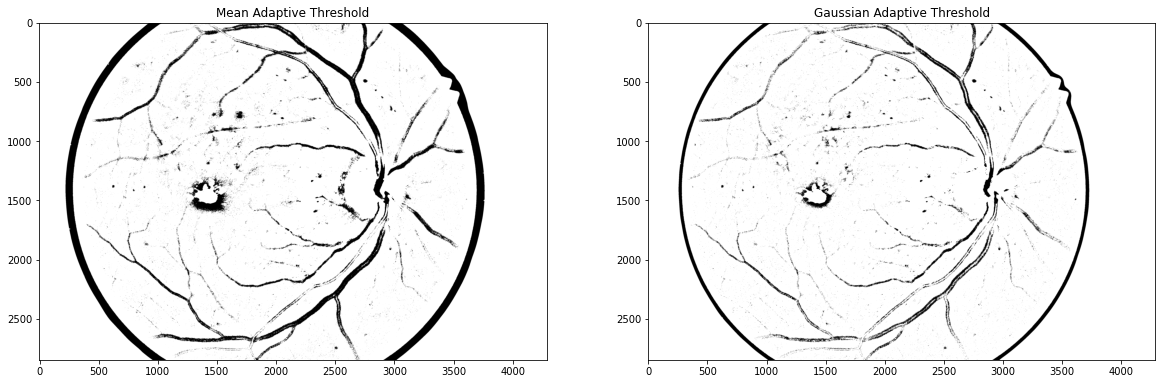

In [17]:
ada_thresh11 = cv2.adaptiveThreshold(img, 200, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 199, 10)
ada_thresh21 = cv2.adaptiveThreshold(img, 200, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 199, 10)
fig, ax = plt.subplots(1,2, figsize=(20,20))

ax[0].imshow(ada_thresh11, cmap="gray");
ax[1].imshow(ada_thresh21, cmap="gray");

ax[0].set_title('Mean Adaptive Threshold')
ax[1].set_title('Gaussian Adaptive Threshold')

### Inference: Here we can infer that when we reduce the maximum value assigned to a pixel and increase the constant value that has to be subtracted an image with more diminished and lighter outlines has been returned. The matter present inside is also lightened.